<a href="https://colab.research.google.com/github/PabloIbVa/menu/blob/main/Practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules

# Parte 1 Clustering en python


**Exploracion y preparacion del dataseet**

In [ ]:
#Cargar el dataseet
df = pd.read_csv("/content/drive/MyDrive/clases/universidad/semestre 6/Mineria de datos/online_retail_II_sample_5000.csv")

#Mostrar las primeras filas
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  555199    85123A   WHITE HANGING HEART T-LIGHT HOLDER         1   
1  554974     21794  CLASSIC FRENCH STYLE BASKET NATURAL        30   
2  579187     22356          CHARLOTTE BAG PINK POLKADOT        13   
3  573546     21770               OPEN CLOSED METAL SIGN         2   
4  546157     22180                       RETROSPOT LAMP         2   

      InvoiceDate  Price  Customer ID         Country  
0  01/06/11 12:05   2.95      14606.0  United Kingdom  
1  27/05/11 17:14   3.95      14031.0  United Kingdom  
2  28/11/11 15:31   1.63          NaN  United Kingdom  
3  31/10/11 13:13   4.95      15974.0  United Kingdom  
4   10/03/11 8:40   9.95      13502.0  United Kingdom  


In [ ]:
#Filtrado de filas donde Quantity y Price sean mayores a 0
df_clean = df[(df["Quantity"] > 0) & (df["Price"] > 0)]

#Eliminacion de datos nulos
df_clean = df_clean.dropna()

#Eliminacion de duplicados
df_clean = df_clean.drop_duplicates()

#Chequeo rapido de los datos
print(df_clean.head())

  Invoice StockCode                          Description  Quantity  \
0  555199    85123A   WHITE HANGING HEART T-LIGHT HOLDER         1   
1  554974     21794  CLASSIC FRENCH STYLE BASKET NATURAL        30   
3  573546     21770               OPEN CLOSED METAL SIGN         2   
4  546157     22180                       RETROSPOT LAMP         2   
5  575618     23012      GLASS APOTHECARY BOTTLE PERFUME         4   

      InvoiceDate  Price  Customer ID         Country  
0  01/06/11 12:05   2.95      14606.0  United Kingdom  
1  27/05/11 17:14   3.95      14031.0  United Kingdom  
3  31/10/11 13:13   4.95      15974.0  United Kingdom  
4   10/03/11 8:40   9.95      13502.0  United Kingdom  
5  10/11/11 12:57   3.95      15463.0  United Kingdom  


In [ ]:
#Impresion de df_clean.describe() para observar la distribucion y detectar valores atipicos
print(df_clean.describe())

          Quantity        Price   Customer ID
count  3658.000000  3658.000000   3658.000000
mean     12.806452     2.959746  15230.322307
std      65.439652     4.071453   1704.588022
min       1.000000     0.040000  12347.000000
25%       2.000000     1.250000  13862.250000
50%       6.000000     1.950000  15058.000000
75%      12.000000     3.750000  16742.000000
max    2880.000000   145.000000  18283.000000


**Seleccion y Normalizacion de Caracteristicas**

In [ ]:
#Creacion de caracteristica TotalPrice
df_clean["TotalPrice"] = df_clean["Quantity"] * df_clean["Price"]

#Guardamos el dataseet en una copia
df_clean.to_csv("/content/drive/MyDrive/clases/universidad/semestre 6/Mineria de datos/copy_online_retail_II_sample_5000.csv", index=False)

#Seleccionamos los datos guardandolos en una variable
features = df_clean[["Quantity", "Price", "TotalPrice"]]

#Verificamos los datos
print(features.head())

   Quantity  Price  TotalPrice
0         1   2.95        2.95
1        30   3.95      118.50
3         2   4.95        9.90
4         2   9.95       19.90
5         4   3.95       15.80


In [ ]:
# Instanciar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
features_scaled = scaler.fit_transform(features)

# Ver resultado como DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=["Quantity", "Price Each", "TotalPrice"])

#Comprobar que su media sea 0 y desviacion estandar de 1
features_scaled.describe()

,Quantity,Price Each,TotalPrice
count,3.658000e+03,3.658000e+03,3.658000e+03
mean,-9.712175e-18,-5.827305e-17,8.740958e-18
std,1.000137e+00,1.000137e+00,1.000137e+00
min,-1.804421e-01,-7.172242e-01,-3.224189e-01
25%,-1.651587e-01,-4.199924e-01,-2.482662e-01
50%,-1.040253e-01,-2.480401e-01,-1.306502e-01
75%,-1.232528e-02,1.941229e-01,-2.160212e-02
max,4.382031e+01,3.489164e+01,3.908146e+01


**Implementacion de K-means**

In [ ]:
#configuracion inicial de valor k = 3

#Creacion del modelo
kmeans = KMeans(n_clusters=3, random_state=42)

#Ajuste del modelo
kmeans.fit(features_scaled)

#Obtener etiquetas de cluster
labels = kmeans.labels_
sse = kmeans.inertia_
sil_score = silhouette_score(features_scaled, labels)

#Impresion de resultados
print(f"Inercia (SSE): {sse}")
print(f"Coeficiente de silueta: {sil_score}")

Inercia (SSE): 5652.917085885671
Coeficiente de silueta: 0.9710940746563202


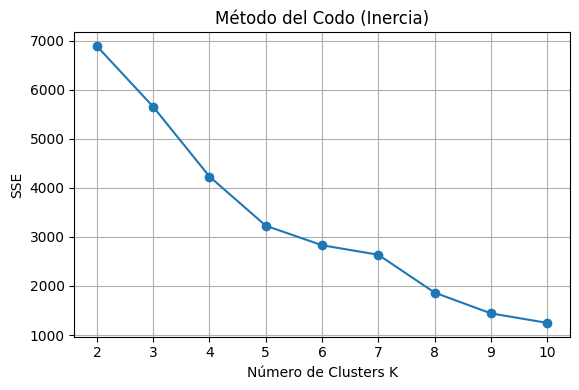

In [ ]:
#Ajuste de valor k probando en un rango de valores de 2 a 10

sse_values = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse_values.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_score = silhouette_score(features_scaled, labels)
    silhouette_scores.append(sil_score)

# Método del codo
plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse_values, marker='o')
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de Clusters K')
plt.ylabel('SSE')

plt.grid(True)

plt.tight_layout()
plt.show()

#El punto optimo es k = 5

**Implementacion de DBSCAN**

In [ ]:
#Configuracion Inicial
dbscan = DBSCAN(eps=1.0, min_samples=5)

dbscan.fit(features_scaled)

# Etiquetas de cluster
db_labels = dbscan.labels_

# Calcular número de clusters (sin contar el ruido)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)

# Calcular número de puntos de ruido
n_noise = list(db_labels).count(-1)

# Calcular coeficiente de silueta si hay al menos 2 clusters
if n_clusters > 1:
    sil_score = silhouette_score(features_scaled , db_labels)
else:
    sil_score = np.nan  # No se puede calcular si todos están en un solo grupo o todos son ruido

# Mostrar resultados
print(f"Número de clusters (sin contar ruido): {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")
print(f"Coeficiente de silueta: {sil_score if not np.isnan(sil_score) else 'No aplicable'}")

Número de clusters (sin contar ruido): 1
Número de puntos de ruido: 19
Coeficiente de silueta: No aplicable


In [ ]:
#Ocupamos distintos datos para comprobar el "esp" y "min_samples" mas apropiados
eps_values = [0.2, 0.3,0.4, 0.5, 0.6, 0.7,0.8 , 0.9, 1.0]
min_samples_values = [1,2,3,4,5,6,7,8,9,10]

best_result = {"eps": None, "min_samples": None, "silhouette": -1, "n_clusters": 0, "n_noise": 0}

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(features_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            sil = silhouette_score(features_scaled, labels)
            print(f"eps={eps}, min_samples={min_samples} --> Clusters: {n_clusters}, Ruido: {n_noise}, Silueta: {sil:.4f}")

            # Guardar mejor configuración
            if sil > best_result["silhouette"]:
                best_result.update({
                    "eps": eps,
                    "min_samples": min_samples,
                    "silhouette": sil,
                    "n_clusters": n_clusters,
                    "n_noise": n_noise
                })
        else:
            print(f"eps={eps}, min_samples={min_samples} --> Clusters: {n_clusters}, Ruido: {n_noise}, Silueta: N/A")

print("\nMejor configuración encontrada:")
print(best_result)


eps=0.2, min_samples=1 --> Clusters: 97, Ruido: 0, Silueta: 0.3779
eps=0.2, min_samples=2 --> Clusters: 37, Ruido: 60, Silueta: 0.3696
eps=0.2, min_samples=3 --> Clusters: 21, Ruido: 92, Silueta: 0.3620
eps=0.2, min_samples=4 --> Clusters: 12, Ruido: 122, Silueta: 0.3517
eps=0.2, min_samples=5 --> Clusters: 12, Ruido: 124, Silueta: 0.3518
eps=0.2, min_samples=6 --> Clusters: 7, Ruido: 150, Silueta: 0.3491
eps=0.2, min_samples=7 --> Clusters: 7, Ruido: 157, Silueta: 0.3437
eps=0.2, min_samples=8 --> Clusters: 8, Ruido: 158, Silueta: 0.3274
eps=0.2, min_samples=9 --> Clusters: 8, Ruido: 159, Silueta: 0.3269
eps=0.2, min_samples=10 --> Clusters: 8, Ruido: 160, Silueta: 0.3273
eps=0.3, min_samples=1 --> Clusters: 57, Ruido: 0, Silueta: 0.4443
eps=0.3, min_samples=2 --> Clusters: 16, Ruido: 41, Silueta: 0.4395
eps=0.3, min_samples=3 --> Clusters: 9, Ruido: 55, Silueta: 0.4685
eps=0.3, min_samples=4 --> Clusters: 6, Ruido: 69, Silueta: 0.4564
eps=0.3, min_samples=5 --> Clusters: 5, Ruido: 77

In [ ]:
#Probamos el nuevo resultado

#Configuracion con los resultados obtenidos
dbscan = DBSCAN(eps=1.0, min_samples=2)

dbscan.fit(features_scaled)

# Etiquetas de cluster
db_labels = dbscan.labels_

# Calcular número de clusters (sin contar el ruido)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)

# Calcular número de puntos de ruido
n_noise = list(db_labels).count(-1)

# Calcular coeficiente de silueta si hay al menos 2 clusters
if n_clusters > 1:
    sil_score = silhouette_score(features_scaled , db_labels)
else:
    sil_score = np.nan  # No se puede calcular si todos están en un solo grupo o todos son ruido

# Mostrar resultados
print(f"Número de clusters (sin contar ruido): {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")
print(f"Coeficiente de silueta: {sil_score if not np.isnan(sil_score) else 'No aplicable'}")

Número de clusters (sin contar ruido): 3
Número de puntos de ruido: 15
Coeficiente de silueta: 0.8656508389308328


**Visualizacion y analisis de resultados**

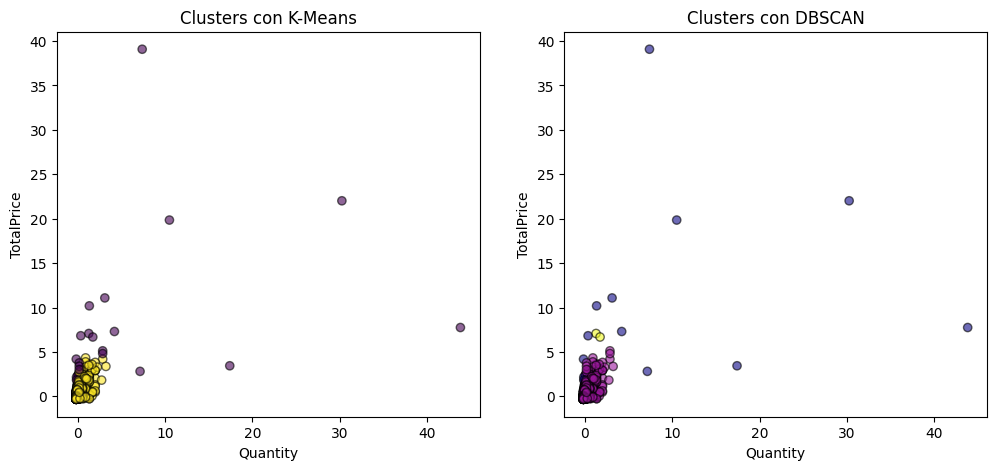

In [ ]:
# Ejes para graficar
x = features_scaled['Quantity']
y = features_scaled['TotalPrice']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.title('Clusters con K-Means')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')

plt.subplot(1, 2, 2)
plt.scatter(x, y, c=db_labels, cmap='plasma', alpha=0.6, edgecolors='k')
plt.title('Clusters con DBSCAN')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')

plt.show()

# Parte 2: Reglas de asociacion en python

**Preparacion de los datos para apriori**

In [ ]:
#Cargamos los datos nuevamente
data = pd.read_csv('/content/drive/MyDrive/clases/universidad/semestre 6/Mineria de datos/online_retail_II_sample_5000.csv')

#Obtenemos un dataseet de Invoice y Description
df_clean = df.dropna(subset=['Invoice', 'Description'])

#Agrupamos por factura e ítem y sumamos las cantidades
basket = (
    df_clean.groupby(['Invoice', 'Description'])['Quantity']
    .sum().unstack().reset_index().fillna(0)
    .set_index('Invoice')
)

#Convertimos las cantidades a presencia binaria (1 si hay, 0 si no hay)
basket_bin = basket.map(lambda x: 1 if x > 0 else 0)

# Filtrado: solo productos en al menos el 0.1% de las transacciones
min_support = 0.001 * len(basket_bin)
item_counts = basket_bin.sum(axis=0)
frequent_items = item_counts[item_counts >= min_support].index
basket_filtered = basket_bin[frequent_items]

# Mostrar dimensiones del resultado
print("Transacciones:", basket_filtered.shape[0])
print("Productos después del filtrado:", basket_filtered.shape[1])


Transacciones: 3677
Productos después del filtrado: 420


In [ ]:
#Probamos la matriz
basket_filtered.head(20).style.set_properties(**{'text-align': 'center'})

Description,OVAL WALL MIRROR DIAMANTE,10 COLOUR SPACEBOY PEN,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 STRIPEY MICE FELTCRAFT,36 DOILIES VINTAGE CHRISTMAS,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,4 WILDFLOWER BOTANICAL CANDLES,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,AIRLINE BAG VINTAGE TOKYO 78,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE ALL GLASS CANDLESTICK,ANTIQUE SILVER T-LIGHT GLASS,ANTIQUE SILVER TEA GLASS ENGRAVED,ANTIQUE SILVER TEA GLASS ETCHED,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOURS SILK FAN,BAKING SET 9 PIECE RETROSPOT,BATH BUILDING BLOCK WORD,BATHROOM METAL SIGN,BEWARE OF THE CAT METAL SIGN,"BIRTHDAY CARD, RETRO SPOT",BISCUITS SMALL BOWL LIGHT BLUE,BLACK RECORD COVER FRAME,BLUE DINER WALL CLOCK,BLUE POLKADOT PLATE,BOX OF 24 COCKTAIL PARASOLS,BREAD BIN DINER STYLE IVORY,BUNDLE OF 3 RETRO NOTE BOOKS,CARD BILLBOARD FONT,CARD DOLLY GIRL,CARD PSYCHEDELIC APPLES,CARD SUKI BIRTHDAY,CERAMIC CHERRY CAKE MONEY BANK,CERAMIC STRAWBERRY MONEY BOX,CHARLOTTE BAG APPLES DESIGN,CHARLOTTE BAG PINK POLKADOT,CHARLOTTE BAG SUKI DESIGN,CHARLOTTE BAG VINTAGE ALPHABET,CHILDREN'S APRON DOLLY GIRL,CHILDRENS APRON SPACEBOY DESIGN,CHILDRENS CUTLERY SPACEBOY,CHILDRENS DOLLY GIRL MUG,CHOCOLATE HOT WATER BOTTLE,CHOCOLATE THIS WAY METAL SIGN,CHRISTMAS CRAFT LITTLE FRIENDS,CHRISTMAS CRAFT TREE TOP ANGEL,CHRISTMAS CRAFT WHITE FAIRY,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,CHRISTMAS PUDDING TRINKET POT,CIRCUS PARADE LUNCH BOX,CLASSIC CAFE SUGAR DISPENSER,CLASSIC GLASS COOKIE JAR,CLOTHES PEGS RETROSPOT PACK 24,COFFEE MUG CAT + BIRD DESIGN,COLOUR GLASS T-LIGHT HOLDER HANGING,COOK WITH WINE METAL SIGN,COTTON APRON PANTRY DESIGN,CREAM SWEETHEART MINI CHEST,CUPCAKE LACE PAPER SET 6,DAIRY MAID LARGE MILK JUG,DANISH ROSE PHOTO FRAME,DECORATION WHITE CHICK MAGIC GARDEN,DELUXE SEWING KIT,DINOSAURS WRITING SET,DOLLY GIRL LUNCH BOX,DOORMAT ENGLISH ROSE,DOORMAT FAIRY CAKE,DOORMAT FANCY FONT HOME SWEET HOME,DOORMAT HEARTS,DOORMAT KEEP CALM AND COME IN,DOORMAT NEW ENGLAND,DOORMAT RED RETROSPOT,DOORMAT SPOTTY HOME SWEET HOME,DOORMAT UNION FLAG,DOTCOM POSTAGE,DRAWER KNOB CRACKLE GLAZE PINK,EDWARDIAN PARASOL NATURAL,ENAMEL BREAD BIN CREAM,ENAMEL MEASURING JUG CREAM,ENCHANTED BIRD COATHANGER 5 HOOK,ENGLISH ROSE HOT WATER BOTTLE,ENGLISH ROSE NOTEBOOK A7 SIZE,FAIRY CAKE FLANNEL ASSORTED COLOUR,FAWN BLUE HOT WATER BOTTLE,FELTCRAFT 6 FLOWER FRIENDS,FELTCRAFT CUSHION BUTTERFLY,FELTCRAFT CUSHION RABBIT,FELTCRAFT PRINCESS LOLA DOLL,FELTCRAFT PRINCESS OLIVIA DOLL,FILIGRIS HEART WITH BUTTERFLY,FLORAL FOLK STATIONERY SET,FOUR HOOK WHITE LOVEBIRDS,FRENCH BATHROOM SIGN BLUE METAL,FRENCH ENAMEL CANDLEHOLDER,FULL ENGLISH BREAKFAST PLATE,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM,GIN + TONIC DIET METAL SIGN,GINGERBREAD MAN COOKIE CUTTER,GINGHAM HEART DOORSTOP RED,GLASS APOTHECARY BOTTLE PERFUME,GRAND CHOCOLATECANDLE,GREEN POLKADOT PLATE,GREEN REGENCY TEACUP AND SAUCER,GREY HEART HOT WATER BOTTLE,GROW A FLYTRAP OR SUNFLOWER IN TIN,GUMBALL COAT RACK,HAND OVER THE CHOCOLATE SIGN,HAND WARMER BABUSHKA DESIGN,HAND WARMER BIRD DESIGN,HAND WARMER OWL DESIGN,HAND WARMER RED LOVE HEART


**Aplicacion de algoritmo apriori**

In [ ]:
# Usamos un soporte minimo del 1 % para encontrar los mas frecuentes
frequent_itemsets = apriori(basket_filtered, min_support = 0.01, use_colnames=True)

# Mostrar ítems frecuentes encontrados
print("Ítems frecuentes:")
print(frequent_itemsets.head(20))

#No hay resultados

Ítems frecuentes:
Empty DataFrame
Columns: [support, itemsets]
Index: []


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Generar reglas de asociación con confianza mínima de 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Mostrar reglas sin filtrar por elevación
print("Reglas generadas:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

#Dado a que no hay valores que cubren el 1% , no hay valores que mostrar

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

**Parametros para optimizacion**

In [ ]:
supports = [0.005, 0.01, 0.015, 0.02]
confidences = [0.3, 0.5, 0.7, 0.8]

results = []

for support in supports:
    frequent_itemsets = apriori(basket_filtered, min_support=support, use_colnames=True)

    if frequent_itemsets.empty:
        continue  # Saltar si no se encuentran ítems frecuentes

    for confidence in confidences:
        try:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
            rules_filtered = rules[rules['lift'] > 1.0]
            results.append({
                'support': support,
                'confidence': confidence,
                'num_rules': len(rules_filtered)
            })
        except ValueError:
            # Si no se pueden generar reglas, continuar
            continue

# Mostrar resumen en tabla
results_df = pd.DataFrame(results)
print("\nResumen de reglas generadas:")
print(results_df.pivot(index='support', columns='confidence', values='num_rules'))



Resumen de reglas generadas:
confidence  0.3  0.5  0.7  0.8
support                       
0.005         0    0    0    0


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in wors

In [ ]:

# Generar ítems frecuentes con soporte muy bajo (0.0002 = 0.02%)
frequent_itemsets = apriori(basket_filtered, min_support=0.0002, use_colnames=True)

# Generar reglas con confianza mínima de 0.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Mostrar columnas clave
rules_top = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)
print("Top 10 reglas de asociación con soporte bajo:")
print(rules_top)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 reglas de asociación con soporte bajo:
                             antecedents  \
0               (36 PENCILS TUBE SKULLS)   
1          ( OVAL WALL MIRROR DIAMANTE )   
2          ( OVAL WALL MIRROR DIAMANTE )   
3          ( OVAL WALL MIRROR DIAMANTE )   
4          ( OVAL WALL MIRROR DIAMANTE )   
5          ( OVAL WALL MIRROR DIAMANTE )   
6          ( OVAL WALL MIRROR DIAMANTE )   
7          ( OVAL WALL MIRROR DIAMANTE )   
8        (ANTIQUE ALL GLASS CANDLESTICK)   
9  (12 PENCILS SMALL TUBE RED RETROSPOT)   

                             consequents   support  confidence        lift  
0          ( OVAL WALL MIRROR DIAMANTE )  0.000272        0.25  229.812500  
1               (36 PENCILS TUBE SKULLS)  0.000272        0.25  229.812500  
2          (ALARM CLOCK BAKELIKE ORANGE)  0.000272        0.25  153.208333  
3     (HEART DECORATION RUSTIC HANGING )  0.000272        0.25  183.850000  
4      (HOT WATER BOTTLE I AM SO POORLY)  0.000272        0.25  183.850000  
5      

In [ ]:
# Aplicar KMeans a la matriz de transacciones
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(basket_filtered)

# Añadir etiquetas de clúster al dataframe
basket_clustered = basket_filtered.copy()
basket_clustered['Cluster'] = clusters

# Ver tamaño de cada clúster
print("Transacciones por clúster:")
print(basket_clustered['Cluster'].value_counts())

Transacciones por clúster:
Cluster
1    3662
0       9
2       6
Name: count, dtype: int64


In [ ]:
# Reglas por clúster
for cluster_id in range(n_clusters):
    print(f"\n--- Reglas para clúster {cluster_id} ---")
    cluster_data = basket_clustered[basket_clustered['Cluster'] == cluster_id].drop(columns='Cluster')

    # Apriori con soporte bajo
    freq_items = apriori(cluster_data, min_support=0.002, use_colnames=True)
    if not freq_items.empty:
        rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
        rules = rules.sort_values(by='lift', ascending=False)
        display_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)
        print(display_rules)
    else:
        print("No se encontraron reglas para este clúster.")



--- Reglas para clúster 0 ---
                  antecedents                     consequents   support  \
0        (CARD SUKI BIRTHDAY)  (SET OF 3 NOTEBOOKS IN PARCEL)  0.111111   
1       (DOORMAT NEW ENGLAND)  (SET OF 3 NOTEBOOKS IN PARCEL)  0.111111   
2  (STORAGE TIN VINTAGE LEAF)  (SET OF 3 NOTEBOOKS IN PARCEL)  0.111111   

   confidence  lift  
0         1.0   1.0  
1         1.0   1.0  
2         1.0   1.0  

--- Reglas para clúster 1 ---
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

--- Reglas para clúster 2 ---


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be dis

                                      antecedents  \
0                                (DOTCOM POSTAGE)   
1                         (HEART OF WICKER SMALL)   
9                         (HEART OF WICKER SMALL)   
8                                (DOTCOM POSTAGE)   
7  (HEART OF WICKER SMALL, RED RETROSPOT PEG BAG)   

                                      consequents   support  confidence  lift  
0                         (HEART OF WICKER SMALL)  0.166667         1.0   6.0  
1                                (DOTCOM POSTAGE)  0.166667         1.0   6.0  
9         (DOTCOM POSTAGE, RED RETROSPOT PEG BAG)  0.166667         1.0   6.0  
8  (HEART OF WICKER SMALL, RED RETROSPOT PEG BAG)  0.166667         1.0   6.0  
7                                (DOTCOM POSTAGE)  0.166667         1.0   6.0  


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
